### 导入库

In [16]:
import os
import pandas as pd
import numpy as np
import datetime
import random
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
from time import time
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### 导入下载的20_newsgroups

但由于是文本，先把它处理成.csv

In [3]:
path = '20_newsgroups/'
file_names = os.listdir(path)
print(file_names)
len(file_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


20

In [4]:
target=[]
data=[]
for file_name in file_names:
    path_ = '20_newsgroups/{}'.format(file_name)
    file_names_ = os.listdir(path_)
    for file in file_names_:
        if file !='.ipynb_checkpoints':
            path__='20_newsgroups/{}/{}'.format(file_name,file)
            text = open(path__, encoding="utf8", errors='ignore')
            text=text.read()
            data.append(text)
            target.append(file_name)

In [5]:
df = pd.DataFrame({'data': data,'target': target}, columns=['data', 'target'])
df.to_csv('./20_newsgroups.csv')

### 探索文本数据

In [6]:
df=pd.read_csv('20_newsgroups.csv')
df

,Unnamed: 0,data,target
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [7]:
df['data'][0]

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-m

In [8]:
np.unique(df.target)

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

### 查看样本均衡与否

通过看每个类占总类别的百分比，可以看到总体是比较均衡

In [9]:
for i in ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc']:
    print(i,(df.target==i).sum()/len(df.target))

alt.atheism 0.050007501125168774
comp.graphics 0.050007501125168774
comp.os.ms-windows.misc 0.050007501125168774
comp.sys.ibm.pc.hardware 0.050007501125168774
comp.sys.mac.hardware 0.050007501125168774
comp.windows.x 0.050007501125168774
misc.forsale 0.050007501125168774
rec.autos 0.050007501125168774
rec.motorcycles 0.050007501125168774
rec.sport.baseball 0.050007501125168774
rec.sport.hockey 0.050007501125168774
sci.crypt 0.050007501125168774
sci.electronics 0.050007501125168774
sci.med 0.050007501125168774
sci.space 0.050007501125168774
soc.religion.christian 0.049857478621793266
talk.politics.guns 0.050007501125168774
talk.politics.mideast 0.050007501125168774
talk.politics.misc 0.050007501125168774
talk.religion.misc 0.050007501125168774


### 数据集划分

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.data,df.target,test_size=0.2,random_state=42)

### 文本特征提取

使用TF-IDF向量

In [11]:
tfidf=TFIDF().fit(x_train)
Xtrain_=tfidf.transform(x_train)
Xtest_=tfidf.transform(x_test)

### 三种不同分布的朴素贝叶斯模型

接下来使用三种不同分布的朴素贝叶斯模型先进行预测。分别是Multinomial，Complement，Bernuolli

由于这里的矩阵比较稀疏，因此这里不宜使用高斯朴素贝叶斯。

In [12]:
name=['Multinomial','Complement','Bernuolli']
models=[MultinomialNB(),ComplementNB(),BernoulliNB()]
for name,mod in zip(name,models):
    times=time()
    mod.fit(Xtrain_,y_train)
    y_pred=mod.predict(Xtest_)
    score=mod.score(Xtest_,y_test)
    
    print(name)
    print("\tAccuracy:{:.3f}".format(score))
    print(classification_report(y_test, y_pred, target_names=np.unique(df.target)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

Multinomial
	Accuracy:0.887
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.84      0.81       237
           comp.graphics       0.86      0.84      0.85       237
 comp.os.ms-windows.misc       0.94      0.87      0.91       271
comp.sys.ibm.pc.hardware       0.81      0.89      0.85       247
   comp.sys.mac.hardware       0.90      0.93      0.91       253
          comp.windows.x       0.94      0.89      0.92       237
            misc.forsale       0.93      0.79      0.86       247
               rec.autos       0.87      0.92      0.89       254
         rec.motorcycles       0.98      0.94      0.96       259
      rec.sport.baseball       0.96      0.94      0.95       244
        rec.sport.hockey       0.93      0.97      0.95       251
               sci.crypt       0.89      0.98      0.93       242
         sci.electronics       0.94      0.80      0.87       269
                 sci.med       1.00      0.89  

可以看到，在目前还没有进行参数调整的情况下，Complement的Accuracy表现最好，但另外两种表现也不错。

### 交叉验证&选择最优超参数

In [15]:
# 交叉验证
cv1= []
cv2= []
cv3= []
mean1=[] 
mean2=[]
mean3=[]
search_list = [0.00001,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.5,0.7,0.9,1] 
for i in search_list:
    accuracy1 = []
    accuracy2 = []
    accuracy3 = []
    print("alpha:",i)
    for j in range(5):
        print("-------------fold{:.1f}------------".format(j))
        x_train, x_test, y_train, y_test = train_test_split(df.data,df.target,test_size=0.2,random_state=42,shuffle=True)
        
        tfidf=TFIDF().fit(x_train)
        Xtrain_=tfidf.transform(x_train)
        Xtest_=tfidf.transform(x_test)

        model1 = MultinomialNB(alpha=i)
        model1.fit(Xtrain_, y_train)
        val_accuracy1= model1.score(Xtest_, y_test)
        
        model2 = ComplementNB(alpha=i)
        model2.fit(Xtrain_, y_train)
        val_accuracy2= model2.score(Xtest_, y_test)
        
        model3 = BernoulliNB(alpha=i)
        model3.fit(Xtrain_, y_train)
        val_accuracy3= model3.score(Xtest_, y_test)
        
        print(j+1,"val_accuracy1:", val_accuracy1)
        print(j+1,"val_accuracy2:", val_accuracy2)
        print(j+1,"val_accuracy3:", val_accuracy3)
        accuracy1.append(val_accuracy1)
        accuracy2.append(val_accuracy2)
        accuracy3.append(val_accuracy3)
    acc_sum=0
    for t in range(len(accuracy1)):
        acc_sum=acc_sum+accuracy1[t]
    print("alpha:",i,"accuracy1:",acc_sum/5)
    acc_sum=0
    for t in range(len(accuracy2)):
        acc_sum=acc_sum+accuracy2[t]
    print("alpha:",i,"accuracy2:",acc_sum/5)
    acc_sum=0
    for t in range(len(accuracy3)):
        acc_sum=acc_sum+accuracy3[t]
    print("alpha:",i,"accuracy3:",acc_sum/5)
    print("\n")
    cv1.append(accuracy1)
    cv2.append(accuracy2)
    cv3.append(accuracy3)
for i in cv1:
    mean1.append(np.mean(i))
for i in cv2:
    mean2.append(np.mean(i))
for i in cv3:
    mean3.append(np.mean(i))

alpha: 1e-05
-------------fold0.0------------
1 val_accuracy1: 0.8735
1 val_accuracy2: 0.859
1 val_accuracy3: 0.9035
-------------fold1.0------------
2 val_accuracy1: 0.8735
2 val_accuracy2: 0.859
2 val_accuracy3: 0.9035
-------------fold2.0------------
3 val_accuracy1: 0.8735
3 val_accuracy2: 0.859
3 val_accuracy3: 0.9035
-------------fold3.0------------
4 val_accuracy1: 0.8735
4 val_accuracy2: 0.859
4 val_accuracy3: 0.9035
-------------fold4.0------------
5 val_accuracy1: 0.8735
5 val_accuracy2: 0.859
5 val_accuracy3: 0.9035
alpha: 1e-05 accuracy1: 0.8735000000000002
alpha: 1e-05 accuracy2: 0.859
alpha: 1e-05 accuracy3: 0.9035


alpha: 0.0001
-------------fold0.0------------
1 val_accuracy1: 0.8795
1 val_accuracy2: 0.8655
1 val_accuracy3: 0.90425
-------------fold1.0------------
2 val_accuracy1: 0.8795
2 val_accuracy2: 0.8655
2 val_accuracy3: 0.90425
-------------fold2.0------------
3 val_accuracy1: 0.8795
3 val_accuracy2: 0.8655
3 val_accuracy3: 0.90425
-------------fold3.0---------

### 绘图

大致的参数与正确率曲线

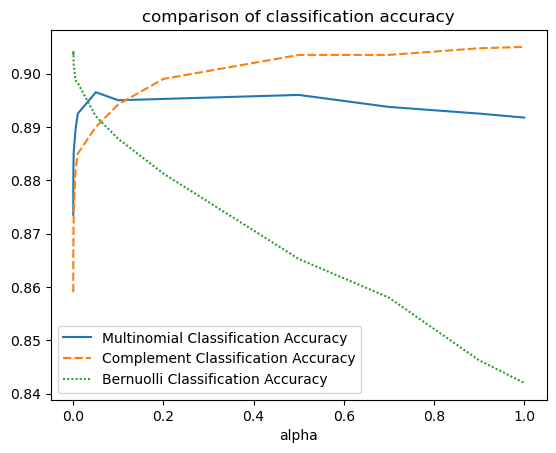

In [17]:
df_plot = pd.DataFrame()
df_plot['alpha'] = search_list
df_plot['Multinomial Classification Accuracy'] = mean1
df_plot['Complement Classification Accuracy'] = mean2
df_plot['Bernuolli Classification Accuracy'] = mean3
df_plot = pd.DataFrame(df_plot).set_index('alpha')
sns.lineplot(data=df_plot)
plt.title("comparison of classification accuracy")
plt.show()

5折交叉验证误差图

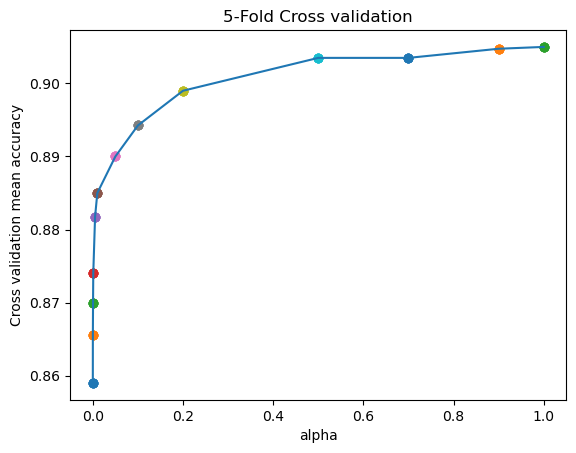

In [20]:
dict_=dict(zip(search_list,cv2))
accu_mean=[]
accu_std=[]
for i,j in dict_.items():
    accu_mean.append(np.mean(j))
    accu_std.append(np.std(j))
for i in search_list:
    accus = dict_[i]
    plt.scatter([i] * len(accus), accus)
plt.errorbar(search_list, accu_mean, accu_std,ecolor='green')
plt.title('5-Fold Cross validation')
plt.xlabel('alpha')
plt.ylabel('Cross validation mean accuracy')
plt.show()

### 最后达到的效果：

In [22]:
alpha_best=search_list[np.argmax(mean2)]
print(alpha_best)

1


In [23]:
model = ComplementNB(alpha=alpha_best)
model.fit(Xtrain_, y_train)
y_pred=model.predict(Xtest_)
val_accuracy= model.score(Xtest_, y_test)
print(classification_report(y_test, y_pred, target_names=np.unique(df.target)))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.81      0.79       173
           comp.graphics       0.88      0.86      0.87       179
 comp.os.ms-windows.misc       0.93      0.93      0.93       226
comp.sys.ibm.pc.hardware       0.91      0.83      0.87       204
   comp.sys.mac.hardware       0.93      0.93      0.93       205
          comp.windows.x       0.92      0.92      0.92       186
            misc.forsale       0.90      0.85      0.88       190
               rec.autos       0.90      0.96      0.93       203
         rec.motorcycles       0.98      1.00      0.99       218
      rec.sport.baseball       0.98      0.96      0.97       192
        rec.sport.hockey       0.93      0.99      0.96       203
               sci.crypt       0.97      0.99      0.98       200
         sci.electronics       0.93      0.92      0.92       227
                 sci.med       0.98      0.97      0.98       196
         

最后达到91%的准确率.